In [43]:
#First we will import all the libraries
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from flask import Flask
from flask import request
from flask_cors import CORS
from flask import render_template
from flask import request
from flask_cors import CORS
#url of csv file
#Read csv file
#I am not downloading the csv file instead ,reading the values directly from the url.
#You can download and give column names accordingly.
#columnn names can also change as this file is present some central repo.
url='https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data';
#columns which we are reading in csv file
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#Reading the csv file using pandas
train_data=pd.read_csv(url,header=None,names=col_names)
#getting the first 5 rows
train_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
train_data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
#Now we will train our model
featured_column=['bmi','insulin']
x=train_data[featured_column]#We will take only this columns to decide whther the person is diabetic or not
y=train_data['label']#This will be the final answer

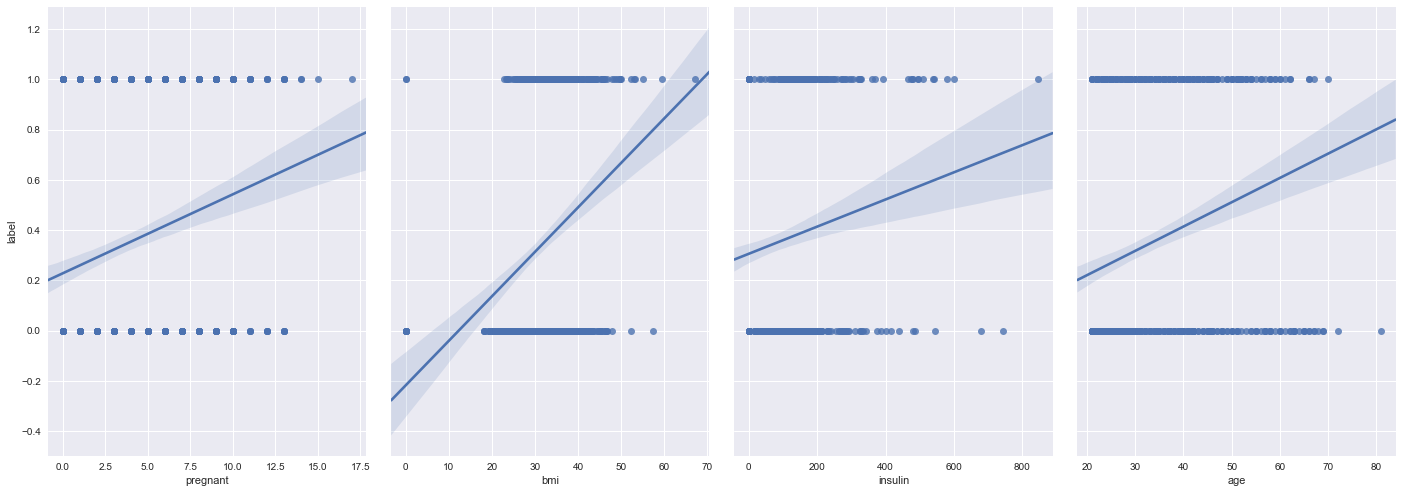

In [47]:
#Plotting the graph to see the distribution of data
sns.pairplot(train_data, x_vars=['pregnant','bmi','insulin','age'], y_vars='label', size=7, aspect=0.7, kind='reg')
sns.plt.show()

In [48]:
#This step is to partition data into training and testing data.It shows how our model will predict.
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [49]:
from flask import Flask
app = Flask(__name__)
CORS(app)

In [50]:
#Import Library
from sklearn import svm

One can tune the SVM by changing the parameters C, \gamma and the kernel function. The function for tuning the parameters available in scikit-learn is called gridSearchCV().

sklearn.model_selection.GridSearchCV(estimator, param_grid)

Parameters of this function are defined as:

estimator: It is the estimator object which is svm.SVC() in our case.
param_grid: It is the dictionary or list with parameters names (string) as keys and lists of parameter settings to try as values.

In [51]:
# Create SVM classification object 
#from sklearn.model_selection import GridSearchCV 
#parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              #[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
#svr = svm.SVC()
#grid = GridSearchCV(svr, parameters)
#grid.fit(x_train, y_train)
#predicted = grid.predict(x_test)
#cnf_matrix = confusion_matrix(y_test, predicted)
#print(cnf_matrix)
model = svm.SVC(kernel='linear', C=1, gamma=100)

In [52]:
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
predicted= model.predict(x_test)
predicted.shape

(192,)

In [54]:
predicted
count=0
for i in range(len(predicted)):
    if predicted[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 133 percentage 0.6927083333333334


In [55]:
@app.route("/SVM/<bmi>/<insulin>")
def svm_response(bmi,insulin):
    x_test=pd.DataFrame([[bmi,insulin]])
    svm_model = svm.SVC(kernel='linear', C=1, gamma=100)
    svm_model.fit(x_train, y_train)
    predicted_svm= svm_model.predict(x_test)
    predicted_svm
    if predicted_svm[0] == 1:
        return "Sorry,you are diabetic"
    else:
        return "You are not diabetic"

In [56]:
#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred
count=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 136 percentage 0.7083333333333334


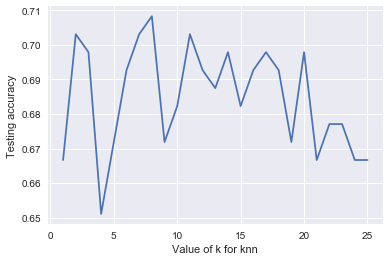

In [57]:
#predicting best value of k
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Value of k for knn")
plt.ylabel("Testing accuracy")

In [58]:
@app.route("/KNN/<bmi>/<insulin>")
def knn_Response(bmi,insulin):
    x_test=pd.DataFrame([[bmi,insulin]])
    knn=KNeighborsClassifier(n_neighbors=8)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    print (y_pred_knn[0],"bmi",bmi,"insulin",insulin)
    if y_pred_knn[0] == 1:
        return "Sorry,you are diabetic"
    else:
        return "You are not diabetic"

In [59]:
#Import Library
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
predicted_bayes= model.predict(x_test)

In [60]:
len(predicted_bayes)

192

In [61]:
count=0
for i in range(len(predicted_bayes)):
    if predicted_bayes[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 132 percentage 0.6875


In [ ]:
@app.route("/NaiveBayes/<bmi>/<insulin>")
def Naive_Bayes_Response(bmi,insulin):
    #query=request.args.get('name')
    x_test=pd.DataFrame([[bmi,insulin]])
    model_gaussian=GaussianNB()
    model_gaussian.fit(x_train,y_train)
    predicted_bayes= model.predict(x_test)
    print (predicted_bayes[0],"bmi",bmi,"insulin",insulin)
    if predicted_bayes[0] == 1:
        return "Sorry,you are diabetic"
    else:
        return "You are not diabetic"


In [ ]:
app.run(host='0.0.0.0',port='5004')

 * Running on http://0.0.0.0:5004/ (Press CTRL+C to quit)
192.168.0.2 - - [23/Sep/2017 20:32:04] "GET /KNN/34/67 HTTP/1.1" 200 -


0 bmi 34 insulin 67


192.168.0.2 - - [23/Sep/2017 21:19:00] "GET /KNN/48/89 HTTP/1.1" 200 -


0 bmi 48 insulin 89


192.168.0.2 - - [23/Sep/2017 21:19:15] "GET /KNN/56/90 HTTP/1.1" 200 -


0 bmi 56 insulin 90


192.168.0.2 - - [23/Sep/2017 21:20:16] "GET /KNN/560/900 HTTP/1.1" 200 -


1 bmi 560 insulin 900


192.168.0.2 - - [23/Sep/2017 21:20:28] "GET /KNN/56/120 HTTP/1.1" 200 -


1 bmi 56 insulin 120


192.168.0.2 - - [23/Sep/2017 21:20:38] "GET /KNN/43/35 HTTP/1.1" 200 -


0 bmi 43 insulin 35


192.168.0.2 - - [23/Sep/2017 21:20:54] "GET /SVM/34/78 HTTP/1.1" 200 -
192.168.0.2 - - [23/Sep/2017 21:21:20] "GET /SVM/67/78 HTTP/1.1" 200 -
192.168.0.2 - - [23/Sep/2017 21:21:47] "GET /NaiveBayes/56/89 HTTP/1.1" 200 -


1 bmi 56 insulin 89


192.168.0.2 - - [23/Sep/2017 21:22:00] "GET /KNN/56/89 HTTP/1.1" 200 -


0 bmi 56 insulin 89


192.168.0.2 - - [23/Sep/2017 21:22:14] "GET /SVM/56/89 HTTP/1.1" 200 -
192.168.0.2 - - [24/Sep/2017 00:14:28] "GET /SVM/43/65 HTTP/1.1" 200 -
192.168.0.2 - - [24/Sep/2017 00:14:42] "GET /KNN/43/65 HTTP/1.1" 200 -


0 bmi 43 insulin 65


192.168.0.2 - - [24/Sep/2017 00:14:52] "GET /NaiveBayes/43/65 HTTP/1.1" 200 -


0 bmi 43 insulin 65


192.168.0.2 - - [24/Sep/2017 00:15:05] "GET /NaiveBayes/58/65 HTTP/1.1" 200 -


1 bmi 58 insulin 65


192.168.0.2 - - [24/Sep/2017 00:15:17] "GET /KNN/58/65 HTTP/1.1" 200 -


0 bmi 58 insulin 65
